
# User Journey Evaluation Notebook

This notebook demonstrates the evaluation of a user journey, focusing on key metrics like precision, recall, and the precision-recall curve. It includes:

1. Loading and processing data.
## EXPLORATORY ANALYSIS:
1. Visualising the user journey path for the top 5 customers.
2. Assessing the end points of the user journey.
4. Analysing the navigation transition from the source to destination.
3. Visualizing the precision-recall curve to assess model performance.


In [41]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns


In [42]:
preprocessed = pd.read_csv('journey_preprocessed.csv')
preprocessed.head(5)

,Unnamed: 0,user_id,user_journey
0,0,1516,Homepage-Other-Other-Homepage-Checkout-Checkou...
1,1,3395,Other-Pricing-Homepage-Pricing-Pricing-Checkou...
2,2,10107,Homepage-Homepage-Career tracks-Homepage-Caree...
3,3,11145,Homepage-Homepage-Homepage-Homepage-Homepage-H...
4,4,12400,Homepage-Career tracks-Other-Career track cert...


In [43]:
preprocessed = preprocessed.drop(columns='Unnamed: 0')
preprocessed.head(5)

,user_id,user_journey
0,1516,Homepage-Other-Other-Homepage-Checkout-Checkou...
1,3395,Other-Pricing-Homepage-Pricing-Pricing-Checkou...
2,10107,Homepage-Homepage-Career tracks-Homepage-Caree...
3,11145,Homepage-Homepage-Homepage-Homepage-Homepage-H...
4,12400,Homepage-Career tracks-Other-Career track cert...


### Metrics 
- **Page count** is the most fundamental metric; it counts how many times each page can be found in all user journeys.
- **Page presence** is similar to ‘page count’ but counts each page only once if it exists in a journey; it shows how many times each page is part of a journey
- **Page destination** is a metric that shows the most frequent follow-ups after every page. It looks at every page and counts which pages follow next. If one is interested in what the users do after visiting page X, they can consult this metric.
- **Page sequences** look at what the most popular run of N pages is. I will consult this metric if I’m interested in the sequence of three (or any other number) pages that most often shows up. Count each sequence only once per journey.
- **Journey length** is a straightforward metric that considers the average length of a user journey in terms of pages.


### Page Count

In [44]:
#example data
data = pd.DataFrame({
    'user_journey': [
        'Homepage-Pricing-Homepage',
        'Homepage-Homepage-Homepage-Pricing',
        'About-About-Contact-Contact-Contact-About',
        'Pricing-Homepage-Pricing-Pricing'
    ]
})

In [45]:
pages = ['Homepage','Pricing','Contact','About']

In [46]:
def page_count(data, pages, target_column='user_journey'):
    # Create a copy of the original data
    new_copy = data.copy()

    # Split the user journey into individual pages
    journey_pages = new_copy[target_column].str.split('-')

    # Count how many of the specified pages are in each user journey
    count_page = journey_pages.apply(lambda x: {page:x.count(page) for page in pages})

    page_counts_df = count_page.apply(pd.Series)

    # Add the page counts as individual columns to the new_copy DataFrame
    new_copy = new_copy.join(page_counts_df.fillna(0))

    return new_copy


In [47]:
#display the output for page count 
page_count(data,pages,target_column='user_journey')

,user_journey,Homepage,Pricing,Contact,About
0,Homepage-Pricing-Homepage,2,1,0,0
1,Homepage-Homepage-Homepage-Pricing,3,1,0,0
2,About-About-Contact-Contact-Contact-About,0,0,3,3
3,Pricing-Homepage-Pricing-Pricing,1,3,0,0


In [48]:
def unique_pages(data, target_column ='user_journey'):
    journey_pages = data[target_column].str.split('-')

    # Find unique pages for each journey using set
    unique_pages = journey_pages.apply(lambda x: list(set(x)))

    # Add the unique pages as a new column to the DataFrame
    data['unique_pages'] = unique_pages

    return data

In [49]:
#check for null fields
preprocessed.isna().sum()

user_id         0
user_journey    2
dtype: int64

In [50]:
preprocessed.dropna(inplace=True)

In [51]:
#store a copy of the original pre-processed dataset to apply unique_pages()
new_processed = preprocessed.copy()

In [52]:
new_processed = unique_pages(new_processed)
new_processed 

,user_id,user_journey,unique_pages
0,1516,Homepage-Other-Other-Homepage-Checkout-Checkou...,"[Other, Checkout, Coupon, Homepage]"
1,3395,Other-Pricing-Homepage-Pricing-Pricing-Checkou...,"[Other, Checkout, Pricing, Homepage]"
2,10107,Homepage-Homepage-Career tracks-Homepage-Caree...,"[Homepage, Other, Career tracks, Courses, Chec..."
3,11145,Homepage-Homepage-Homepage-Homepage-Homepage-H...,"[Checkout, Homepage]"
4,12400,Homepage-Career tracks-Other-Career track cert...,"[Homepage, Instructors, Other, Career tracks, ..."
...,...,...,...
1345,509060,Other-Other,[Other]
1346,509061,Coupon,[Coupon]
1347,509085,Coupon,[Coupon]
1348,509095,Other-Other-Other-Other,[Other]


In [53]:
def find_unique_pages_in_dataframe(data, target_column='user_journey'):
    # Split the user journey into individual pages, handling NaN values
    journey_pages = data[target_column].dropna().str.split('-')

    # Flatten the list of lists and create a set to get unique pages
    all_pages = [page for pages in journey_pages for page in pages]
    unique_pages = set(all_pages)

    return unique_pages


In [54]:
pages = find_unique_pages_in_dataframe(new_processed,target_column='user_journey')

In [55]:
print(f"The unique set of pages visited by users at 365 Data science are: {pages}")

The unique set of pages visited by users at 365 Data science are: {'Upcoming courses', 'Homepage', 'Pricing', 'Instructors', 'Other', 'About us', 'Career tracks', 'Course certificate', 'Coupon', 'Blog', 'Courses', 'Career track certificate', 'Checkout', 'Success stories', 'Resources center'}


In [56]:
#add count of the number of times each page has been visited by each user_id
new_processed = page_count(new_processed,pages,target_column='user_journey')
new_processed

,user_id,user_journey,unique_pages,Upcoming courses,Homepage,Pricing,Instructors,Other,About us,Career tracks,Course certificate,Coupon,Blog,Courses,Career track certificate,Checkout,Success stories,Resources center
0,1516,Homepage-Other-Other-Homepage-Checkout-Checkou...,"[Other, Checkout, Coupon, Homepage]",0,2,0,0,2,0,0,0,1,0,0,0,7,0,0
1,3395,Other-Pricing-Homepage-Pricing-Pricing-Checkou...,"[Other, Checkout, Pricing, Homepage]",0,1,3,0,1,0,0,0,0,0,0,0,2,0,0
2,10107,Homepage-Homepage-Career tracks-Homepage-Caree...,"[Homepage, Other, Career tracks, Courses, Chec...",0,6,0,0,1,0,7,0,0,0,2,0,6,0,1
3,11145,Homepage-Homepage-Homepage-Homepage-Homepage-H...,"[Checkout, Homepage]",0,9,0,0,0,0,0,0,0,0,0,0,1,0,0
4,12400,Homepage-Career tracks-Other-Career track cert...,"[Homepage, Instructors, Other, Career tracks, ...",0,3,0,1,1,0,1,0,0,0,0,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1345,509060,Other-Other,[Other],0,0,0,0,2,0,0,0,0,0,0,0,0,0,0
1346,509061,Coupon,[Coupon],0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
1347,509085,Coupon,[Coupon],0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
1348,509095,Other-Other-Other-Other,[Other],0,0,0,0,4,0,0,0,0,0,0,0,0,0,0


In [57]:
#create a function to check the binary presence of a page 
def page_presence(data, pages, target_column='user_journey'):
    # Create a copy of the original data
    new_copy = data.copy()

    # Split the user journey into individual pages, handling potential NaN values
    journey_pages = new_copy[target_column].dropna().str.split('-')

    # Count the presence of each page (once per journey)
    page_presence = journey_pages.apply(lambda x: {page: 1 if page in x else 0 for page in pages})

    # Convert the page_presence dictionaries into a DataFrame
    page_presence_df = pd.DataFrame(page_presence.tolist(), index=journey_pages.index)

    # Join the presence DataFrame to the original DataFrame

    return page_presence_df


In [58]:
presence = page_presence(new_processed,pages,'user_journey')
presence

,Upcoming courses,Homepage,Pricing,Instructors,Other,About us,Career tracks,Course certificate,Coupon,Blog,Courses,Career track certificate,Checkout,Success stories,Resources center
0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0
1,0,1,1,0,1,0,0,0,0,0,0,0,1,0,0
2,0,1,0,0,1,0,1,0,0,0,1,0,1,0,1
3,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0
4,0,1,0,1,1,0,1,0,0,0,0,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1345,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1346,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
1347,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
1348,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0


In [59]:
from collections import defaultdict
#create a function to check the what the user's follow up page is 
def page_dest(data,target_column='user_journey'):
    '''
    Args: 

    data: The dataset containing the user journey
    target_column: The user journey strings in the dataset
    follow_up_counts: A nested dictionary (using defaultdict) to count transitions between pages.
                        The outer dictionary keys represent the current page.
                        The inner dictionary keys represent the next page and their corresponding counts.
    '''
    follow_up_counts = defaultdict(lambda: defaultdict(int)) #Each key automatically maps to another dictionary with integer default values.

    #iterate over each user journey 
    for journey in data[target_column].dropna():
        pages = journey.split('-')
        for i in range(len(pages)-1):
            current_page = pages[i] #The page the user is currently on.
            next_page = pages[i+1] #The page the user navigates to after the current page.
            follow_up_counts[current_page][next_page] += 1

    follow_up_df = pd.DataFrame(follow_up_counts).fillna(0).astype(int)

    return follow_up_df

- The function calculates the number of times users move from one page to another across all journeys in the dataset.
- It outputs a dataframe where rows represent the current page and columns represent the next page. Each cell indicates how many times a user transitioned from the row page to the column page.

In [60]:
# Assuming 'new_processed' is your DataFrame
follow_up_df = page_dest(new_processed, 'user_journey')


In [61]:
follow_up_df

,Homepage,Other,Checkout,Coupon,Pricing,Career tracks,Resources center,Courses,Career track certificate,Instructors,Course certificate,Success stories,Upcoming courses,About us,Blog
Other,120,647,43,21,44,48,353,42,12,2,9,4,7,6,12
Checkout,400,127,823,85,353,69,11,109,17,1,12,7,2,1,2
Pricing,470,62,132,11,77,96,20,101,47,6,19,3,7,3,1
Homepage,697,237,222,93,237,248,48,278,61,22,29,8,5,2,2
Career tracks,363,31,5,6,67,114,13,292,173,0,14,6,24,0,0
Resources center,58,305,7,4,44,19,45,29,21,0,10,8,10,2,1
Instructors,25,1,1,2,2,3,1,3,2,0,0,0,0,1,0
Career track certificate,126,24,2,0,62,93,16,42,39,2,51,4,7,1,0
Coupon,102,126,89,336,43,41,12,63,16,0,8,2,4,0,0
Courses,263,48,18,6,116,356,33,161,42,7,38,1,33,1,2


The above tables helps us understand user behaviour in the following ways:
- Identifies common navigation patterns and bottlenecks.
- Optimise Navigation: Highlights areas where users drop off or rarely navigate.
- Improve User Experience: Data can inform redesigns to make high-value paths easier to access.


In [62]:

def common_pages(data,target_column='user_journey'):
    journey_pages = data[target_column].dropna().str.split('-')

    for journey in data[target_column].dropna():
        pages 
    all_pages = [page for pages in journey_pages for page in pages]

    page_counts= pd.Series(all_pages).value_counts()

    return page_counts

- The function identifies all the pages visited in user journeys and counts their occurrences across the dataset.
- It is useful for understanding page popularity or finding high-traffic pages.

In [63]:
top_pages = common_pages(new_processed,target_column='user_journey')
top_pages

Homepage                    2738
Checkout                    2064
Other                       1763
Courses                     1187
Career tracks               1135
Pricing                     1094
Coupon                      1041
Resources center             580
Career track certificate     481
Course certificate           217
Upcoming courses             114
Success stories               53
Instructors                   43
About us                      22
Blog                          20
dtype: int64


The result of the page visit frequency analysis provides key insights into user behavior and website performance. Below is a breakdown of the findings:

### 1. Most Popular Pages
- **Homepage (2738 visits)**: The homepage has the highest traffic, as it is typically the primary entry point to the website.
- **Checkout (2064 visits)**: High traffic to the checkout page indicates significant user interest in completing transactions, a critical stage in the user journey.
- **Other (1763 visits)**: Represents uncategorized or miscellaneous pages. Understanding what "Other" includes could clarify its role in user navigation.

---

### 2. Content Priorities
- **Courses (1187 visits)** and **Career tracks (1135 visits)**: These pages are central to user engagement. Users are likely exploring offerings to decide what suits their needs.
- **Pricing (1094 visits)**: Indicates users are highly interested in understanding costs before making purchasing decisions.

---

### 3. Engagement Opportunities
- **Coupon (1041 visits)**: Suggests users are motivated by discounts or promotions. Highlighting coupons in marketing campaigns may increase conversions.
- **Resources center (580 visits)**: This is a moderately visited area, implying potential for improvement in promoting learning resources.
- **Career track certificate (481 visits)** and **Course certificate (217 visits)**: Suggest users are interested in certifications, but these pages have relatively low visits. Highlighting certifications' value could drive more traffic.

---

### 4. Low-Traffic Pages
- **Upcoming courses (114 visits)**: Low traffic could indicate a lack of interest or insufficient promotion. 
- **Success stories (53 visits)**, **Instructors (43 visits)**, **About us (22 visits)**, and **Blog (20 visits)**: These pages are underperforming, likely because they are not perceived as valuable or are difficult to find. These areas may require better content strategy or visibility.




### Optimize User Journey
- High traffic to the **Homepage** and **Checkout** suggests users are moving through the site with purchasing intent. Improving navigation from the homepage to other high-value pages (e.g., Courses, Pricing) could increase conversions.
- Investigate friction points on pages with significant drop-offs (e.g., Homepage to Checkout).

### Promote Low-Traffic Pages
- For pages like **Success stories**, **Instructors**, and **Blog**, assess whether they add value to the user journey. If so, improve visibility through internal linking, email marketing, or social media campaigns.

### Highlight High-Value Offerings
- Use insights from pages like **Career tracks**, **Courses**, and **Coupon** to prioritize marketing campaigns. For example:
  - Emphasize promotional offers to capitalize on users’ interest in **Coupons**.
  - Showcase the relevance and benefits of **Career tracks** and **Courses** to drive deeper engagement.

### Understand Behavior with "Other"
- Significant traffic to "Other" (1763 visits) indicates potential ambiguity in the categorization. Analyze what "Other" includes and determine if these pages require better segmentation or clearer labeling.


### Optimize User Journey
- High traffic to the **Homepage** and **Checkout** suggests users are moving through the site with purchasing intent. Improving navigation from the homepage to other high-value pages (e.g., Courses, Pricing) could increase conversions.
- Investigate friction points on pages with significant drop-offs (e.g., Homepage to Checkout).

### Promote Low-Traffic Pages
- For pages like **Success stories**, **Instructors**, and **Blog**, assess whether they add value to the user journey. If so, improve visibility through internal linking, email marketing, or social media campaigns.

### Highlight High-Value Offerings
- Use insights from pages like **Career tracks**, **Courses**, and **Coupon** to prioritize marketing campaigns. For example:
  - Emphasize promotional offers to capitalize on users’ interest in **Coupons**.
  - Showcase the relevance and benefits of **Career tracks** and **Courses** to drive deeper engagement.

### Understand Behavior with "Other"
- Significant traffic to "Other" (1763 visits) indicates potential ambiguity in the categorization. Analyze what "Other" includes and determine if these pages require better segmentation or clearer labeling.

---

### 6. Strategic Insights
- **User Intent**: Traffic patterns reveal that users are primarily focused on exploring courses and career paths, checking prices, and proceeding to checkout.
- **Engagement Opportunities**: Certifications and resources are areas of moderate interest that could be scaled up.
- **Content Gaps**: Low interest in "About us," "Blog," and similar pages suggests they may not align with user priorities or expectations.



In [64]:
#popular sequence of pages visited by users in their journey
def popular_seq(data, N, target_column='user_journey'):
    sequence_counts = defaultdict(int)

    for journey in data[target_column].dropna():
        pages = journey.split('-')

        unique_seq = set() #to negate the repetition of pages and only view unique pages in the sequence 

        for i in range(len(pages) - N + 1):
            sequence = tuple(pages[i:i + N]) #N = the threshold for the number of pages in the sequence 
            unique_seq.add(sequence)

        for sequence in unique_seq:
            sequence_counts[sequence] += 1
    
    sorted_sequence = sorted(sequence_counts.items(), key=lambda x: x[1], reverse=True)
    return sorted_sequence

In [65]:
# Assuming 'new_processed' is your DataFrame and you want sequences of length 3
popular_sequences = popular_seq(new_processed, 3, 'user_journey')

# Print the top 5 most popular sequences
print(popular_sequences[:5])


[(('Checkout', 'Checkout', 'Checkout'), 150), (('Homepage', 'Checkout', 'Checkout'), 138), (('Homepage', 'Pricing', 'Checkout'), 115), (('Homepage', 'Homepage', 'Checkout'), 111), (('Homepage', 'Homepage', 'Homepage'), 108)]


In [66]:
popular_sequences

[(('Checkout', 'Checkout', 'Checkout'), 150),
 (('Homepage', 'Checkout', 'Checkout'), 138),
 (('Homepage', 'Pricing', 'Checkout'), 115),
 (('Homepage', 'Homepage', 'Checkout'), 111),
 (('Homepage', 'Homepage', 'Homepage'), 108),
 (('Homepage', 'Pricing', 'Homepage'), 103),
 (('Other', 'Other', 'Other'), 101),
 (('Career tracks', 'Courses', 'Career tracks'), 74),
 (('Pricing', 'Checkout', 'Pricing'), 74),
 (('Homepage', 'Career tracks', 'Homepage'), 72),
 (('Homepage', 'Homepage', 'Pricing'), 72),
 (('Other', 'Homepage', 'Homepage'), 72),
 (('Courses', 'Career tracks', 'Courses'), 70),
 (('Checkout', 'Homepage', 'Checkout'), 68),
 (('Homepage', 'Courses', 'Homepage'), 67),
 (('Pricing', 'Checkout', 'Homepage'), 66),
 (('Career tracks', 'Courses', 'Homepage'), 63),
 (('Career tracks', 'Homepage', 'Career tracks'), 60),
 (('Pricing', 'Checkout', 'Checkout'), 59),
 (('Checkout', 'Checkout', 'Homepage'), 59),
 (('Coupon', 'Coupon', 'Coupon'), 59),
 (('Pricing', 'Homepage', 'Pricing'), 56),


In [67]:
def avg_journey_length(data,target_column='user_journey'):
    journey_length = data[target_column].dropna().str.split('-').apply(len)


    avg_length = journey_length.mean()

    return avg_length

In [68]:
avg_j_length = avg_journey_length(new_processed)
print(f"The average journey length is: {avg_j_length:.2f} pages")


The average journey length is: 9.31 pages


### Early User Behaviour 
#### **Key Implications of the Threshold \( N = 3 \)**

1. **Focus on Initial Behavior**:
   - By restricting to the first 3 pages, the focus is on users' immediate navigation patterns, highlighting their first interactions with the site.

2. **Truncated Journeys**:
   - While the average journey length is 9.31 pages, this threshold omits deeper exploration or conversion behavior later in the session.

3. **Critical Pages in Early Navigation**:
   - Pages like **Homepage**, **Pricing**, and **Checkout** are frequently observed, underscoring their importance in capturing user attention early.

---

#### **Revised Observations with \( N = 3 \)**

1. **Repeated Pages Early**:
   - Sequences like `('Homepage', 'Homepage', 'Homepage')` and `('Checkout', 'Checkout', 'Checkout')` suggest:
     - Users revisit pages to confirm information.
     - Potential inefficiencies in navigation due to unclear pathways or misplaced links.

2. **Homepage-Centric Paths**:
   - Many journeys begin at the **Homepage** (e.g., `'Homepage', 'Pricing', 'Checkout'` and `'Homepage', 'Career tracks', 'Homepage'`).
     - The **Homepage** serves as a critical starting point, and its design heavily influences user behavior.
     - Clearer pathways to high-value pages like **Checkout**, **Pricing**, and **Courses** could streamline user journeys.

3. **Pricing and Conversion**:
   - Early visits to **Pricing** pages (e.g., `'Homepage', 'Pricing', 'Checkout'` and `'Pricing', 'Checkout', 'Pricing'`) reflect price-sensitive behavior.
     - Users are likely seeking detailed cost information before committing to a purchase or enrollment.

4. **Exploration Behavior**:
   - Sequences like `('Career tracks', 'Courses', 'Career tracks')` and `('Courses', 'Career tracks', 'Courses')` show users exploring learning offerings early in their journey.

5. **Coupon Interest**:
   - The sequence `('Coupon', 'Coupon', 'Coupon')` highlights early focus on promotions or discounts, emphasizing the importance of promotions in user retention.

---


In [69]:
popular_sequences2 = popular_seq(new_processed, 9, 'user_journey')
print(f"Popular sequences according to average user journey length {popular_sequences2[0:5]}")

Popular sequences according to average user journey length [(('Other', 'Other', 'Other', 'Other', 'Other', 'Other', 'Other', 'Other', 'Other'), 26), (('Checkout', 'Checkout', 'Checkout', 'Checkout', 'Checkout', 'Checkout', 'Checkout', 'Checkout', 'Checkout'), 17), (('Homepage', 'Checkout', 'Checkout', 'Checkout', 'Checkout', 'Checkout', 'Checkout', 'Checkout', 'Checkout'), 11), (('Career tracks', 'Courses', 'Career tracks', 'Courses', 'Career tracks', 'Courses', 'Career tracks', 'Courses', 'Career tracks'), 11), (('Courses', 'Career tracks', 'Courses', 'Career tracks', 'Courses', 'Career tracks', 'Courses', 'Career tracks', 'Courses'), 9)]


### 1. **Repetition in User Behavior**
- **'Other' Sequence**:
  - `('Other', 'Other', 'Other', ..., 'Other')` (26 occurrences)
  - Indicates a significant number of users remain within pages categorized as "Other."
  - Possible reasons:
    - Ambiguous or irrelevant content keeping users from transitioning to more valuable pages.
    - Misclassification of pages into the "Other" category.

- **'Checkout' Sequence**:
  - `('Checkout', 'Checkout', ..., 'Checkout')` (17 occurrences)
  - Suggests users repeatedly interact with the **Checkout** page, which may indicate:
    - Revisits for confirmation or price comparisons.
    - Usability issues preventing transaction completion.
### 2. **Exploration Sequences**
- **'Career Tracks' and 'Courses' Loop**:
  - `('Career tracks', 'Courses', ..., 'Career tracks')` (11 occurrences)
- **'Courses' and 'Career Tracks' Loop**:
  - `('Courses', 'Career tracks', ..., 'Courses')` (9 occurrences)
- These loops suggest users are exploring and comparing options repeatedly, indicating interest but potentially lacking clarity to make decisions.

### 3. **Extended Checkout Path**
- `('Homepage', 'Checkout', ..., 'Checkout')` (11 occurrences)
  - Suggests a lengthy process from the **Homepage** to **Checkout**, with repeated visits to **Checkout** reflecting hesitation or price comparisons.

---

### **Interpretation and Implications**

#### **1. Repetitive Behavior on "Other" Pages**
- High interaction with "Other" pages implies either:
  - Users are spending time on low-value pages.
  - Pages classified as "Other" may need better organization or clearer labeling to guide users to key areas like **Checkout** or **Courses**.

#### **2. Repetition on Checkout**
- Repeated visits to **Checkout** suggest friction in the purchase process, potentially due to:
  - Unclear pricing or insufficient information.
  - Users leaving items in the cart and revisiting later.

#### **3. Exploration of Career Tracks and Courses**
- Repeated navigation between **Career Tracks** and **Courses** indicates interest but also a lack of clarity in presenting differences or benefits.
- Users may need additional guidance, such as comparison tools or personalized recommendations.

#### **4. Lengthy Homepage to Checkout Journeys**
- A sequence like `('Homepage', 'Checkout', ..., 'Checkout')` suggests inefficiencies in navigation, where users revisit **Checkout** without completing a transaction.

---

### **Strategic Recommendations**

#### **1. Address "Other" Page Behavior**
- Analyse "Other" pages to determine:
  - Their relevance and importance in the user journey.
  - Whether they are incorrectly classified and should belong to a clearer category (e.g., resources or promotional content).
- Streamline navigation from "Other" pages to key areas like **Courses**, **Pricing**, or **Checkout**.

#### **2. Optimise Checkout Process**
- Investigate reasons behind users revisiting the **Checkout** page and take action:
  - Provide clearer and more detailed pricing information upfront.
  - Simplify checkout steps with progress indicators.
  - Use cart reminders or offer incentives to complete transactions.

#### **3. Clarify Career Tracks and Courses**
- For users repeatedly navigating between **Career Tracks** and **Courses**, consider:
  - Adding comparison tools or detailed benefits of each option.
  - Using personalization to recommend specific tracks or courses based on user profiles.


---

#### **Conclusion**
The data highlights repetitive behaviors and navigation inefficiencies. Addressing issues on **Other** and **Checkout** pages, while optimising exploration between **Courses** and **Career Tracks**, can enhance the user experience and drive conversions

In [70]:
#to understand patterns for each subscription type 
df_2 = pd.read_csv('user_journey_raw.csv')


In [71]:
subcription_type = new_processed.merge(df_2,on='user_id',how='inner')
subcription_type

,user_id,user_journey_x,unique_pages,Upcoming courses,Homepage,Pricing,Instructors,Other,About us,Career tracks,...,Coupon,Blog,Courses,Career track certificate,Checkout,Success stories,Resources center,session_id,subscription_type,user_journey_y
0,1516,Homepage-Other-Other-Homepage-Checkout-Checkou...,"[Other, Checkout, Coupon, Homepage]",0,2,0,0,2,0,0,...,1,0,0,0,7,0,0,2980231,Annual,Homepage-Log in-Log in-Log in-Log in-Log in-Lo...
1,1516,Homepage-Other-Other-Homepage-Checkout-Checkou...,"[Other, Checkout, Coupon, Homepage]",0,2,0,0,2,0,0,...,1,0,0,0,7,0,0,2980248,Annual,Other-Sign up-Sign up-Sign up-Sign up-Sign up-...
2,1516,Homepage-Other-Other-Homepage-Checkout-Checkou...,"[Other, Checkout, Coupon, Homepage]",0,2,0,0,2,0,0,...,1,0,0,0,7,0,0,2992252,Annual,Log in-Log in-Log in-Log in-Log in-Log in
3,1516,Homepage-Other-Other-Homepage-Checkout-Checkou...,"[Other, Checkout, Coupon, Homepage]",0,2,0,0,2,0,0,...,1,0,0,0,7,0,0,3070491,Annual,Homepage-Log in-Log in-Log in-Log in-Log in-Lo...
4,1516,Homepage-Other-Other-Homepage-Checkout-Checkou...,"[Other, Checkout, Coupon, Homepage]",0,2,0,0,2,0,0,...,1,0,0,0,7,0,0,3709807,Annual,Log in-Log in-Log in-Log in-Log in-Log in-Log ...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9928,509095,Other-Other-Other-Other,[Other],0,0,0,0,4,0,0,...,0,0,0,0,0,0,0,4487613,Annual,Other-Other-Other-Other-Other-Other-Other-Othe...
9929,509095,Other-Other-Other-Other,[Other],0,0,0,0,4,0,0,...,0,0,0,0,0,0,0,4842565,Annual,Other-Other-Other-Other-Other-Other-Other-Othe...
9930,509095,Other-Other-Other-Other,[Other],0,0,0,0,4,0,0,...,0,0,0,0,0,0,0,4843103,Annual,Other-Other
9931,509095,Other-Other-Other-Other,[Other],0,0,0,0,4,0,0,...,0,0,0,0,0,0,0,4845316,Annual,Other-Other-Other-Other-Other-Other-Other-Othe...


In [72]:
subcription_type.drop(columns='user_journey_y',inplace=True)


In [73]:
subcription_type

,user_id,user_journey_x,unique_pages,Upcoming courses,Homepage,Pricing,Instructors,Other,About us,Career tracks,Course certificate,Coupon,Blog,Courses,Career track certificate,Checkout,Success stories,Resources center,session_id,subscription_type
0,1516,Homepage-Other-Other-Homepage-Checkout-Checkou...,"[Other, Checkout, Coupon, Homepage]",0,2,0,0,2,0,0,0,1,0,0,0,7,0,0,2980231,Annual
1,1516,Homepage-Other-Other-Homepage-Checkout-Checkou...,"[Other, Checkout, Coupon, Homepage]",0,2,0,0,2,0,0,0,1,0,0,0,7,0,0,2980248,Annual
2,1516,Homepage-Other-Other-Homepage-Checkout-Checkou...,"[Other, Checkout, Coupon, Homepage]",0,2,0,0,2,0,0,0,1,0,0,0,7,0,0,2992252,Annual
3,1516,Homepage-Other-Other-Homepage-Checkout-Checkou...,"[Other, Checkout, Coupon, Homepage]",0,2,0,0,2,0,0,0,1,0,0,0,7,0,0,3070491,Annual
4,1516,Homepage-Other-Other-Homepage-Checkout-Checkou...,"[Other, Checkout, Coupon, Homepage]",0,2,0,0,2,0,0,0,1,0,0,0,7,0,0,3709807,Annual
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9928,509095,Other-Other-Other-Other,[Other],0,0,0,0,4,0,0,0,0,0,0,0,0,0,0,4487613,Annual
9929,509095,Other-Other-Other-Other,[Other],0,0,0,0,4,0,0,0,0,0,0,0,0,0,0,4842565,Annual
9930,509095,Other-Other-Other-Other,[Other],0,0,0,0,4,0,0,0,0,0,0,0,0,0,0,4843103,Annual
9931,509095,Other-Other-Other-Other,[Other],0,0,0,0,4,0,0,0,0,0,0,0,0,0,0,4845316,Annual


In [74]:
def user_sessions_analysis(data, user_column='user_id', session_column='session_id', checkout_column='checkout_completed'):
    """
    Calculate the total number of sessions and the number of sessions leading to checkout for each user.

    Args:
    - data (DataFrame): The input DataFrame containing user journey data.
    - user_column (str): Column name for user IDs.
    - session_column (str): Column name for session IDs.
    - checkout_column (str): Column name indicating whether checkout was completed (e.g., True/False or 1/0).

    Returns:
    - DataFrame: A summary DataFrame with user_id, total_sessions, and checkout_sessions.
    """
    # Group by user ID to calculate metrics
    user_stats = data.groupby(user_column).agg(
        total_sessions=(session_column, 'nunique'),  # Count unique session IDs per user
        checkout_sessions=(checkout_column, 'sum')  # Sum of checkout completions per user
    ).reset_index()

    return user_stats


In [75]:
user_checkout = user_sessions_analysis(subcription_type,user_column='user_id', session_column='session_id',checkout_column='Checkout')

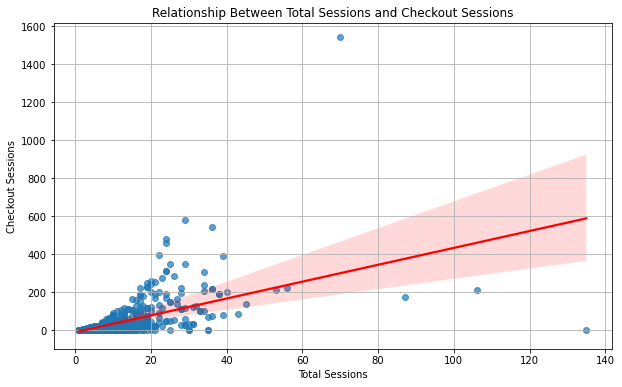

In [76]:
def plot_sessions_relation(dataframe, total_sessions_column='total_sessions', checkout_sessions_column='checkout_sessions'):
    # Create the plot
    plt.figure(figsize=(10, 6))
    sns.regplot(
        x=dataframe[total_sessions_column],
        y=dataframe[checkout_sessions_column],
        scatter_kws={'alpha': 0.7},
        line_kws={'color': 'red'}
    )
    plt.title('Relationship Between Total Sessions and Checkout Sessions')
    plt.xlabel('Total Sessions')
    plt.ylabel('Checkout Sessions')
    plt.grid(True)
    plt.show()

# Example call (replace `your_dataframe` with the actual DataFrame):
plot_sessions_relation(user_checkout)

1. **Positive Correlation**:
   - The red regression line has an upward slope, indicating that **more total sessions are associated with higher checkout sessions**.
   - This aligns with the expectation that higher user engagement often leads to more opportunities for conversions.

2. **Outliers**:
   - Some points deviate significantly from the main trend. For example:
     - A point just below 1600 checkout sessions and ~140 total sessions.
   - Such outliers might represent:
     - Unique user behaviors (e.g., power users or bulk purchasers).
     - Anomalies or errors in data collection.

3. **Density of Points**:
   - Most points are concentrated in the lower-left quadrant:
     - Low total sessions and low checkout sessions.
   - This indicates that many users have limited engagement and perform fewer checkouts.

4. **Variability in the Relationship**:
   - The shaded region widens as total sessions increase, suggesting **greater variability** among users with high total sessions:
     - Some highly engaged users have many checkouts.
     - Others with similarly high sessions have relatively low checkouts.


### Insights
### 1. **Engagement Drives Conversions**:
   - The positive correlation suggests that **increasing total user sessions** can lead to more checkouts.
   - Strategies to retain users and encourage repeated visits could improve checkout rates.

### 2. **Variability at High Sessions**:
   - For users with high total sessions but low checkouts:
     - Investigate potential friction points or drop-offs in the conversion funnel.
     - Address obstacles such as pricing concerns, unclear CTAs, or poor UX.

### 3. **Outliers**:
   - Outliers with very high checkout sessions warrant further investigation:
     - Are these bulk purchasers or anomalies?
   - Similarly, review outliers with low checkouts despite high sessions to identify missed opportunities.

### 4. **Low-Engagement Users**:
   - A significant portion of users remain in the low total sessions/low checkout category:
     - Target these users with campaigns to improve engagement.
     - Provide personalised recommendations or incentives to convert them into repeat users.

In [77]:
import pandas as pd
import plotly.graph_objects as go

def create_user_journey_flow(data, target_column='user_journey'):
    """
    Create a Sankey diagram to visualize user journey flows.

    Args:
    - data (DataFrame): The input DataFrame containing user journey data.
    - target_column (str): Column name for the user journey strings.

    Returns:
    - Sankey Diagram: Visual representation of user journey flows.
    """
    # Step 1: Extract source and destination pairs from journeys
    transitions = []
    for journey in data[target_column].dropna():
        pages = journey.split('-')
        transitions += [(pages[i], pages[i + 1]) for i in range(len(pages) - 1)]

    # Step 2: Count occurrences of each transition
    transition_counts = pd.DataFrame(transitions, columns=['source', 'destination'])
    transition_counts = transition_counts.value_counts().reset_index(name='count')

    # Step 3: Map pages to indices for Sankey diagram
    all_pages = pd.unique(transition_counts[['source', 'destination']].values.ravel('K'))
    page_to_index = {page: i for i, page in enumerate(all_pages)}

    # Step 4: Prepare Sankey diagram data
    sources = transition_counts['source'].map(page_to_index)
    destinations = transition_counts['destination'].map(page_to_index)
    values = transition_counts['count']

    # Step 5: Create the Sankey diagram
    fig = go.Figure(data=[go.Sankey(
        node=dict(
            pad=15,
            thickness=20,
            line=dict(color="black", width=0.5),
            label=list(page_to_index.keys())
        ),
        link=dict(
            source=sources,
            target=destinations,
            value=values
        )
    )])

    fig.update_layout(title_text="User Journey Flow Diagram", font_size=10)
    fig.show()

# Example DataFrame
data = pd.DataFrame({
    'user_journey': [
        'home-about-contact',
        'home-pricing-contact',
        'home-about-about',
        'about-contact-home',
        'pricing-home-contact'
    ]
})

# Create the Sankey diagram


In [78]:

def frequent_customer_sequences(data, customer_column='customer_type', target_column='user_journey', frequent_customer_value='frequent', N=3):
    """
    Find the most common sequences of pages for frequent customers.

    Args:
    - data (DataFrame): Input data containing user journeys.
    - customer_column (str): Column name identifying customer type.
    - target_column (str): Column name with user journey strings.
    - frequent_customer_value (str): Value in customer_column that represents frequent customers.
    - N (int): Length of the sequence to analyze (e.g., 3 for 3-page sequences).

    Returns:
    - DataFrame: Most common N-page sequences for frequent customers with their counts.
    """
    # Filter data for frequent customers
    frequent_customers_data = data[data[customer_column] == frequent_customer_value]

    # Dictionary to store sequences and their counts
    sequence_counts = defaultdict(int)

    # Extract sequences from user journeys
    for journey in frequent_customers_data[target_column].dropna():
        pages = journey.split('-')
        
        # Generate N-length sequences
        for i in range(len(pages) - N + 1):
            sequence = tuple(pages[i:i + N])
            sequence_counts[sequence] += 1

    # Convert sequence counts to a DataFrame
    sequence_df = pd.DataFrame(sequence_counts.items(), columns=['sequence', 'count'])
    sequence_df = sequence_df.sort_values(by='count', ascending=False).reset_index(drop=True)

    return sequence_df


In [79]:
frequent_customer_sequences(subcription_type, customer_column='subscription_type', target_column='user_journey_x', frequent_customer_value='Annual', N=3)


,sequence,count
0,"(Resources center, Other, Resources center)",19909
1,"(Other, Resources center, Other)",19334
2,"(Homepage, Homepage, Homepage)",15830
3,"(Other, Other, Other)",5752
4,"(Checkout, Checkout, Checkout)",3385
...,...,...
970,"(Career track certificate, Homepage, Coupon)",2
971,"(Other, Career track certificate, Coupon)",2
972,"(Other, Courses, Career track certificate)",2
973,"(Upcoming courses, Resources center, Pricing)",2


**Key Insights**

##### **1. Resources Center and Other Pages**
- The frequent back-and-forth between **Resources center** and **Other** pages may highlight:
  - Ineffective linking to key decision pages.
  - Over-reliance on "Other" as a catch-all category, which can confuse users as mentioned earlier.

##### **2. Homepage Repetition**
- High counts for `('Homepage', 'Homepage', 'Homepage')` suggest:
  - Navigation issues or poorly designed pathways leading users to rely on the **Homepage** repeatedly.
  - An opportunity to streamline user journeys with clear CTAs or better menu designs.

##### **3. Checkout Behavior**
- Repetition in **Checkout** suggests users are either:
  - Hesitant to complete transactions due to unclear information or technical barriers.
  - Comparing prices or promotions before committing.

##### **4. Low-Traffic Sequences**
- Sequences like `(Upcoming courses, Resources center, Pricing)` and `(Homepage, Upcoming courses, Other)` with only 2 occurrences indicate:
  - These pages are not part of typical user journeys.
  - They may need better visibility or improved integration into primary navigation flows.
Frequent sequences reveal both opportunities and challenges in the user journey:
- While users rely heavily on certain pages (e.g., Resources center, Homepage), these pages need better pathways to guide them toward conversions.
- Repeated visits to Checkout highlight potential friction in completing purchases.
- Low-traffic pages offer opportunities for better integration and visibility.

By addressing these areas, the overall user experience can be streamlined, leading to higher engagement and conversions. 

In [80]:
user_checkout.sort_values(by='checkout_sessions',ascending=False,inplace=True)

In [81]:
new_processed.loc[new_processed['user_id']==454643]

,user_id,user_journey,unique_pages,Upcoming courses,Homepage,Pricing,Instructors,Other,About us,Career tracks,Course certificate,Coupon,Blog,Courses,Career track certificate,Checkout,Success stories,Resources center
395,454643,Coupon-Courses-Homepage-Courses-Courses-Pricin...,"[Upcoming courses, Homepage, Pricing, Other, C...",6,18,5,0,5,0,10,3,2,0,33,1,22,0,2


In [82]:
top_users = new_processed.groupby('user_id')['Checkout'].sum().nlargest(5).index


In [83]:
top_users

Int64Index([454643, 476110, 478040, 230961, 496848], dtype='int64', name='user_id')

In [84]:
top_user_journeys = []
for user_id in top_users:
    user_journey = new_processed.loc[new_processed['user_id']==user_id,'user_journey']
    top_user_journeys.append((user_id,user_journey.tolist()))

In [85]:
top_user_journeys_df = pd.DataFrame(top_user_journeys)
top_user_journeys_df

,0,1
0,454643,[Coupon-Courses-Homepage-Courses-Courses-Prici...
1,476110,[Homepage-Checkout-Checkout-Checkout-Checkout-...
2,478040,[Homepage-Coupon-Checkout-Checkout-Checkout-Ch...
3,230961,[Other-Homepage-Homepage-Checkout-Checkout-Che...
4,496848,[Homepage-Career tracks-Checkout-Checkout-Home...


In [86]:
top_user_journeys_df.drop([0],inplace=True)

In [87]:
top_user_journeys_df

,0,1
1,476110,[Homepage-Checkout-Checkout-Checkout-Checkout-...
2,478040,[Homepage-Coupon-Checkout-Checkout-Checkout-Ch...
3,230961,[Other-Homepage-Homepage-Checkout-Checkout-Che...
4,496848,[Homepage-Career tracks-Checkout-Checkout-Home...


In [88]:
top_users_4 = top_user_journeys_df[0].tolist()
top_users_4

[476110, 478040, 230961, 496848]

In [89]:
# Filter rows where user_id is in the list
subset_df = new_processed[new_processed['user_id'].isin(top_users_4)]



In [90]:
subset_df = pd.DataFrame(subset_df['user_journey'])

In [91]:
subset_df

,user_journey
88,Other-Homepage-Homepage-Checkout-Checkout-Chec...
1000,Homepage-Checkout-Checkout-Checkout-Checkout-C...
1013,Homepage-Coupon-Checkout-Checkout-Checkout-Che...
1135,Homepage-Career tracks-Checkout-Checkout-Homep...


In [92]:

def create_user_journey_flow_with_direction(data, target_column='user_journey'):
    """
    Create a Sankey diagram to visualise user journey flows with directional indicators.

    Args:
    - data (DataFrame): The input DataFrame containing user journey data.
    - target_column (str): Column name for the user journey strings.

    Returns:
    - Sankey Diagram: Visual representation of user journey flows.
    """
    # Step 1: Extract source and destination pairs from journeys
    transitions = []
    for journey in data[target_column].dropna():
        pages = journey.split('-')
        transitions += [(pages[i], pages[i + 1]) for i in range(len(pages) - 1)]

    # Step 2: Count occurrences of each transition
    transition_counts = pd.DataFrame(transitions, columns=['source', 'destination'])
    transition_counts = transition_counts.value_counts().reset_index(name='count')

    # Step 3: Map pages to indices for Sankey diagram
    all_pages = pd.unique(transition_counts[['source', 'destination']].values.ravel('K'))
    page_to_index = {page: i for i, page in enumerate(all_pages)}

    # Step 4: Prepare Sankey diagram data
    sources = transition_counts['source'].map(page_to_index)
    destinations = transition_counts['destination'].map(page_to_index)
    values = transition_counts['count']

    # Step 5: Create the Sankey diagram
    fig = go.Figure(data=[go.Sankey(
        node=dict(
            pad=15,
            thickness=20,
            line=dict(color="black", width=0.5),
            label=list(page_to_index.keys())
        ),
        link=dict(
            source=sources,
            target=destinations,
            value=values,
            color="rgba(0, 150, 136, 0.5)"  # Flow color (semi-transparent)
        )
    )])

    # Add directional annotations
    fig.update_layout(
        title_text="User Journey Flow Diagram with Direction",
        font_size=10,
        annotations=[
            dict(
                x=0.1,
                y=1.05,
                text="Incoming Flow",
                showarrow=False,
                font=dict(size=14, color="blue")
            ),
            dict(
                x=0.9,
                y=1.05,
                text="Outgoing Flow",
                showarrow=False,
                font=dict(size=14, color="blue")
            )
        ]
    )

    fig.show()



In [93]:
create_user_journey_flow_with_direction(subset_df,target_column='user_journey')

#### High Traffic on Checkout:
- Indicates user intent to convert, but the flow from Checkout to other pages may signal friction or hesitation in completing purchases.
 **Recommendation**: Optimise the checkout process to ensure smoother transitions and higher completion rates. (Refer 3. from Key insights)
- **Dependence on Homepage**:
The Homepage serves as a central navigation hub, with users frequently returning to it.
 **Recommendation**: Streamline pathways to reduce reliance on the Homepage and improve direct transitions between key pages.
- **Significant "Other" Page Traffic**:
The Other node has substantial activity, but its role is unclear due to its generic labeling.
 **Recommendation**: Audit and reclassify pages in the "Other" category to better understand user behavior and provide clearer navigation options.
- **Low Traffic to Coupon and Career-tracks**:
These pages may be underutilised despite their importance in driving user engagement or conversions.
 **Recommendation**: Increase their visibility through targeted CTAs, internal linking, or better placement in the navigation flow.

In [94]:
subcription_type.subscription_type.unique()

array(['Annual', 'Monthly', 'Quarterly'], dtype=object)

In [95]:

def extract_last_checkpoint(data, user_column='user_id', journey_column='user_journey'):
    """
    Extract the last checkpoint (last page visited) for each user.

    Args:
    - data (DataFrame): Input data containing user journey information.
    - user_column (str): Column name for user IDs.
    - journey_column (str): Column name for user journeys (as strings).

    Returns:
    - DataFrame: A DataFrame with user IDs and their last checkpoint.
    """
    # Extract the last page for each user's journey
    data['last_checkpoint'] = data[journey_column].apply(
        lambda x: x.split('-')[-1] if pd.notnull(x) else None
    )
    
    # Group by user ID and get the last checkpoint
    last_checkpoints = data.groupby(user_column)['last_checkpoint'].last().reset_index()

    return last_checkpoints


In [96]:
last_checkpoint =extract_last_checkpoint(new_processed,user_column='user_id',journey_column='user_journey')
last_checkpoint

,user_id,last_checkpoint
0,1516,Checkout
1,3395,Checkout
2,10107,Checkout
3,11145,Checkout
4,12400,Checkout
...,...,...
1343,509060,Other
1344,509061,Coupon
1345,509085,Coupon
1346,509095,Other


In [97]:
last_checkpoint.last_checkpoint.unique()

array(['Checkout', 'Coupon', 'Other', 'Homepage', 'Courses', 'Pricing',
       'Success stories', 'Instructors', 'Career tracks',
       'Career track certificate'], dtype=object)

In [98]:
last_checkpoint.last_checkpoint.value_counts()

Checkout                    717
Coupon                      476
Other                       110
Homepage                     24
Courses                       8
Pricing                       5
Career tracks                 5
Success stories               1
Instructors                   1
Career track certificate      1
Name: last_checkpoint, dtype: int64

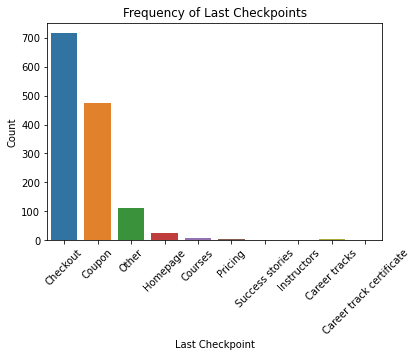

In [99]:
# Ensure last_checkpoint is passed as a DataFrame column name
sns.countplot(data=last_checkpoint, x="last_checkpoint")
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability (optional)
plt.title("Frequency of Last Checkpoints")
plt.xlabel("Last Checkpoint")
plt.ylabel("Count")
plt.show()


## **Implications**

1. **Checkout Drop-offs**:
   - High traffic to **Checkout** is positive, but ending journeys here might indicate incomplete transactions or friction in the process.

2. **Coupon Optimization**:
   - The large number of users stopping at **Coupon** pages suggests they are a key interest point but may need improvements to drive users toward checkout.

3. **Opportunities for Engagement**:
   - Low usage of pages like **Courses**, **Success stories**, and **Career track certificate** indicates they are underutilized.
   - Improving visibility or linking them to high-traffic pages could boost engagement.


In [100]:


def create_navigation_heatmap(data, journey_column='user_journey'):
    """
    Create a heatmap of navigation transitions between pages.

    Args:
    - data (DataFrame): DataFrame containing user journey data.
    - journey_column (str): Column name for user journeys (as strings).

    Returns:
    - Heatmap: Visual representation of navigation transitions.
    """
    # Step 1: Extract transitions
    transitions = []
    for journey in data[journey_column].dropna():
        pages = journey.split('-')
        transitions += [(pages[i], pages[i + 1]) for i in range(len(pages) - 1)]

    # Step 2: Create a transition DataFrame
    transition_df = pd.DataFrame(transitions, columns=['source', 'destination'])

    # Step 3: Create a transition matrix
    transition_matrix = transition_df.pivot_table(
        index='source', 
        columns='destination', 
        aggfunc='size', 
        fill_value=0
    )

    # Step 4: Normalize the matrix (optional)
    normalized_matrix = transition_matrix.div(transition_matrix.sum(axis=1), axis=0)

    # Step 5: Visualize the heatmap
    plt.figure(figsize=(10, 8))
    sns.heatmap(normalized_matrix, annot=True, cmap='Blues', fmt='.2f', cbar_kws={'label': 'Proportion'})
    plt.title('Heatmap of Navigation Transitions')
    plt.xlabel('Destination Page')
    plt.ylabel('Source Page')
    plt.xticks(rotation=45)
    plt.yticks(rotation=45)
    plt.show()

    return normalized_matrix




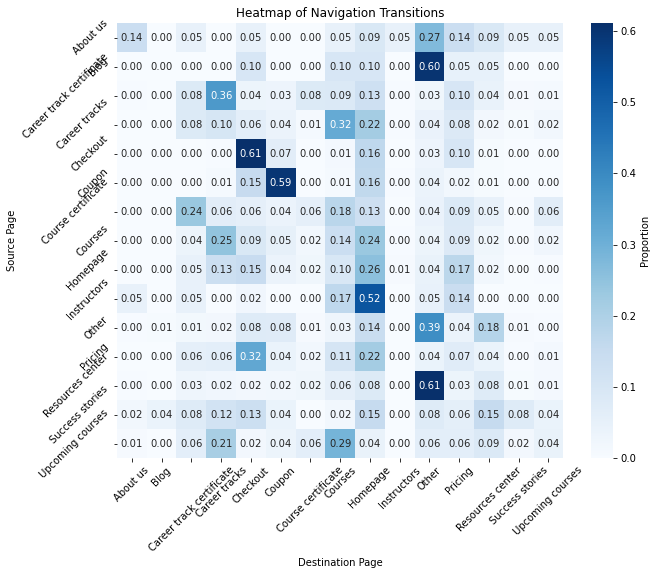

destination,About us,Blog,Career track certificate,Career tracks,Checkout,Coupon,Course certificate,Courses,Homepage,Instructors,Other,Pricing,Resources center,Success stories,Upcoming courses
source,,,,,,,,,,,,,,,
About us,0.136364,0.000000,0.045455,0.000000,0.045455,0.000000,0.000000,0.045455,0.090909,0.045455,0.272727,0.136364,0.090909,0.045455,0.045455
Blog,0.000000,0.000000,0.000000,0.000000,0.100000,0.000000,0.000000,0.100000,0.100000,0.000000,0.600000,0.050000,0.050000,0.000000,0.000000
Career track certificate,0.004167,0.000000,0.081250,0.360417,0.035417,0.033333,0.081250,0.087500,0.127083,0.004167,0.025000,0.097917,0.043750,0.008333,0.010417
Career tracks,0.000000,0.000000,0.082301,0.100885,0.061062,0.036283,0.011504,0.315044,0.219469,0.002655,0.042478,0.084956,0.016814,0.006195,0.020354
Checkout,0.000000,0.000000,0.001485,0.003712,0.610987,0.066073,0.002227,0.013363,0.164811,0.000742,0.031923,0.097996,0.005197,0.001485,0.000000
Coupon,0.001770,0.000000,0.000000,0.010619,0.150442,0.594690,0.000000,0.010619,0.164602,0.003540,0.037168,0.019469,0.007080,0.000000,0.000000
Course certificate,0.000000,0.000000,0.235023,0.064516,0.055300,0.036866,0.055300,0.175115,0.133641,0.000000,0.041475,0.087558,0.046083,0.004608,0.064516
Courses,0.000000,0.001696,0.035623,0.247668,0.092451,0.053435,0.021204,0.136556,0.235793,0.002545,0.035623,0.085666,0.024597,0.004241,0.022901
Homepage,0.002211,0.001474,0.046426,0.133751,0.147384,0.037583,0.024318,0.096905,0.256817,0.009211,0.044215,0.173176,0.021371,0.001474,0.003685


In [101]:

create_navigation_heatmap(new_processed,'user_journey')

In [102]:
def journey_length(data,target_column='user_journey'):
    j_l = data[target_column].dropna().str.split('-').apply(len)


    data['journey_length']= j_l

    return data

In [103]:
new_processed['journey_length'] = new_processed['user_journey'].apply(len)
new_processed

,user_id,user_journey,unique_pages,Upcoming courses,Homepage,Pricing,Instructors,Other,About us,Career tracks,Course certificate,Coupon,Blog,Courses,Career track certificate,Checkout,Success stories,Resources center,last_checkpoint,journey_length
0,1516,Homepage-Other-Other-Homepage-Checkout-Checkou...,"[Other, Checkout, Coupon, Homepage]",0,2,0,0,2,0,0,0,1,0,0,0,7,0,0,Checkout,99
1,3395,Other-Pricing-Homepage-Pricing-Pricing-Checkou...,"[Other, Checkout, Pricing, Homepage]",0,1,3,0,1,0,0,0,0,0,0,0,2,0,0,Checkout,56
2,10107,Homepage-Homepage-Career tracks-Homepage-Caree...,"[Homepage, Other, Career tracks, Courses, Chec...",0,6,0,0,1,0,7,0,0,0,2,0,6,0,1,Checkout,244
3,11145,Homepage-Homepage-Homepage-Homepage-Homepage-H...,"[Checkout, Homepage]",0,9,0,0,0,0,0,0,0,0,0,0,1,0,0,Checkout,89
4,12400,Homepage-Career tracks-Other-Career track cert...,"[Homepage, Instructors, Other, Career tracks, ...",0,3,0,1,1,0,1,0,0,0,0,1,1,0,1,Checkout,109
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1345,509060,Other-Other,[Other],0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,Other,11
1346,509061,Coupon,[Coupon],0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,Coupon,6
1347,509085,Coupon,[Coupon],0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,Coupon,6
1348,509095,Other-Other-Other-Other,[Other],0,0,0,0,4,0,0,0,0,0,0,0,0,0,0,Other,23


In [104]:
reg_data = new_processed.copy()
reg_data.to_csv('user_data_end.csv')

In [105]:
# Define funnel stages
funnel_stages = ['Homepage', 'Pricing', 'Checkout']

# Count occurrences of users at each stage
funnel_counts = {stage: reg_data['user_journey'].str.contains(stage).sum() for stage in funnel_stages}

# Create a DataFrame for visualization
funnel_df = pd.DataFrame({
    'Stage': funnel_stages,
    'Users': [funnel_counts[stage] for stage in funnel_stages]
})


In [106]:
funnel_df

,Stage,Users
0,Homepage,843
1,Pricing,476
2,Checkout,821


count    1348.000000
mean       91.603116
std       165.857768
min         5.000000
25%        20.000000
50%        47.000000
75%       108.250000
max      4150.000000
Name: journey_length, dtype: float64


<AxesSubplot:title={'center':'Distribution of Journey Lengths'}, ylabel='Frequency'>

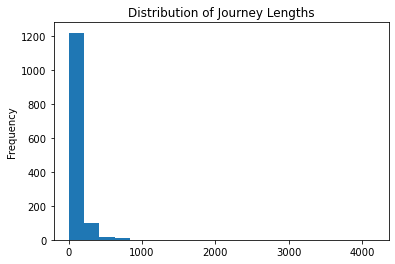

In [107]:
# Summary statistics for journey length
print(reg_data['journey_length'].describe())

# Plot the distribution
reg_data['journey_length'].plot(kind='hist', bins=20, title='Distribution of Journey Lengths')



## Precision-Recall Curve

The precision-recall curve illustrates the tradeoff between precision and recall for different threshold values. 
It is particularly useful for imbalanced datasets, where one class significantly outnumbers the other.

### Key Definitions:
- **Precision**: The fraction of true positives among all predicted positives.
- **Recall**: The fraction of true positives among all actual positives.

The curve helps in identifying the optimal balance between precision and recall, which depends on the specific requirements of the problem.


We use logistic regression to predict whether a user's last checkpoint is the Checkout page, based on features derived from their behaviour. 



In [108]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

# Prepare features and target
X = reg_data[['journey_length', 'Homepage', 'Pricing', 'Checkout']]
y = (reg_data['last_checkpoint'] == 'Checkout').astype(int)

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Evaluate model
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.83      0.87      0.85       186
           1       0.88      0.85      0.87       219

    accuracy                           0.86       405
   macro avg       0.86      0.86      0.86       405
weighted avg       0.86      0.86      0.86       405



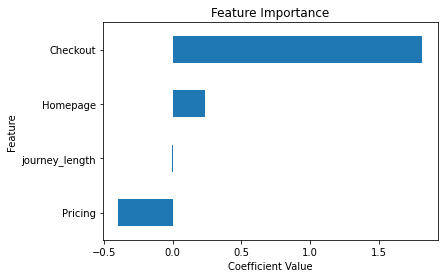

In [109]:

# Extract feature importance
coefficients = pd.Series(model.coef_[0], index=X_train.columns)

# Plot coefficients
coefficients.sort_values().plot(kind='barh', title='Feature Importance')
plt.xlabel('Coefficient Value')
plt.ylabel('Feature')
plt.show()


If the model is predicting whether a user's last checkpoint is checkout, feature importance might indicate:
Features most influential in determining the likelihood of a successful purchase 
Insights into customer behaviour, such as the importance of past purchase frequency or user location.


## Precision-Recall Curve

The precision-recall curve illustrates the tradeoff between precision and recall for different threshold values. 
It is particularly useful for imbalanced datasets, where one class significantly outnumbers the other.

### Key Definitions:
- **Precision**: The fraction of true positives among all predicted positives.
- **Recall**: The fraction of true positives among all actual positives.

The curve helps in identifying the optimal balance between precision and recall, which depends on the specific requirements of the problem.


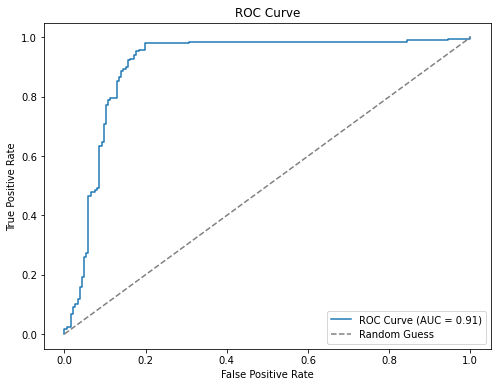

In [110]:
from sklearn.metrics import roc_curve, roc_auc_score

# Get predicted probabilities
y_prob = model.predict_proba(X_test)[:, 1]  # Probabilities for the positive class

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
auc_score = roc_auc_score(y_test, y_prob)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {auc_score:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random Guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()


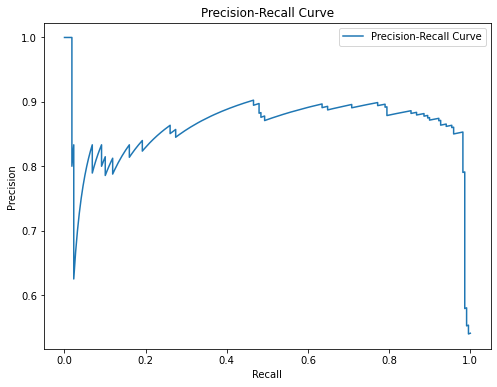

In [111]:
from sklearn.metrics import precision_recall_curve

# Calculate precision and recall
precision, recall, thresholds = precision_recall_curve(y_test, y_prob)

# Plot Precision-Recall curve
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, label='Precision-Recall Curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.show()


**Model Performance**:
High AUC (0.91) from the ROC Curve indicates the model effectively separates users whose last checkpoint is Checkout from those whose last checkpoint is not.
- The Precision-Recall Curve reinforces this, showing the model maintains a strong balance between false positives and false negatives.
**Potential Improvements**:
- Adding more features (e.g., page transitions, engagement time) to further improve predictions.
Perform hyperparameter tuning for the logistic regression model to enhance performance.